In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [5]:
dataset =pd.read_csv('IoT Network Intrusion Dataset.csv')
data = dataset.copy()
data

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,192.168.0.24-210.89.164.90-56112-8043-17,192.168.0.24,56112,210.89.164.90,8043,17,25/07/2019 03:25:00 AM,277,1,1,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,Anomaly,Mirai,Mirai-UDP Flooding
625779,192.168.0.13-222.131.171.244-554-4570-6,222.131.171.244,4570,192.168.0.13,554,6,26/05/2019 10:06:51 PM,1658,0,2,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,Anomaly,DoS,DoS-Synflooding
625780,192.168.0.13-192.168.0.16-9020-52739-6,192.168.0.16,52739,192.168.0.13,9020,6,11/07/2019 01:29:09 AM,77,1,1,...,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,Anomaly,Scan,Scan Port OS
625781,192.168.0.13-192.168.0.16-9020-49784-6,192.168.0.13,9020,192.168.0.16,49784,6,20/05/2019 05:00:29 AM,240,2,1,...,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,Normal,Normal,Normal


In [6]:
data.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [7]:
print("Gözlem sayısı : " ,len(data))
print("Değişken sayısı : ", len(data.columns))

Gözlem sayısı :  625783
Değişken sayısı :  86


In [8]:
#null and infinite value cleanup
data = data.replace([np.inf, -np.inf], np.nan) 
data = data.dropna()

In [9]:
#removing unnecessary lines
data.drop(["Src_IP","Dst_IP","Src_Port","Dst_Port","Timestamp","Protocol","Flow_ID"],axis=1,inplace=True)

In [10]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Src_Port,625783.0,35026.156190,24721.047752,0.0,9020.0,51991.0,56361.000000,65500.000000
Dst_Port,625783.0,16387.027479,17550.363037,0.0,8899.0,9020.0,10101.000000,65371.000000
Protocol,625783.0,9.971436,5.379857,0.0,6.0,6.0,17.000000,17.000000
Flow_Duration,625783.0,635.422865,3496.740723,0.0,76.0,132.0,221.000000,99984.000000
Tot_Fwd_Pkts,625783.0,1.675566,4.309970,0.0,0.0,1.0,2.000000,186.000000
...,...,...,...,...,...,...,...,...
Active_Min,625783.0,3.462159,64.111043,0.0,0.0,0.0,0.000000,6659.000000
Idle_Mean,625783.0,502.503832,2112.957360,0.0,73.0,93.5,141.000000,99973.000000
Idle_Std,625783.0,52.403995,1153.184897,0.0,0.0,0.0,1.527525,67071.906623
Idle_Max,625783.0,561.540512,2866.497606,0.0,74.0,114.0,154.000000,99973.000000



# Encoding


In [11]:
data['Label'].value_counts()

Anomaly    585342
Normal      40073
Name: Label, dtype: int64

In [12]:
data['Cat'].value_counts()

Mirai                415309
Scan                  75265
DoS                   59391
Normal                40073
MITM ARP Spoofing     35377
Name: Cat, dtype: int64

In [13]:
data['Sub_Cat'].value_counts()

Mirai-UDP Flooding       183189
Mirai-Hostbruteforceg    121178
DoS-Synflooding           59391
Mirai-HTTP Flooding       55818
Mirai-Ackflooding         55124
Scan Port OS              53073
Normal                    40073
MITM ARP Spoofing         35377
Scan Hostport             22192
Name: Sub_Cat, dtype: int64

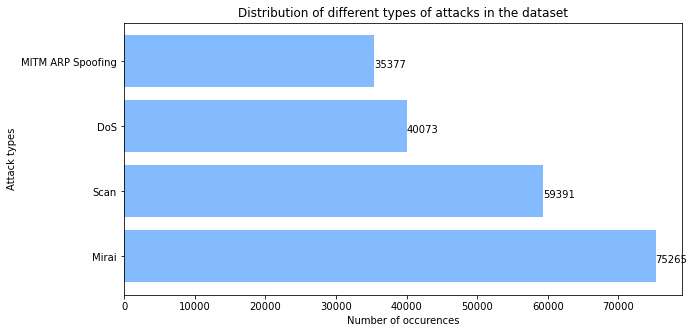

In [14]:
plt.figure(figsize=(10,5))

attack = ('Mirai', 'Scan',  'DoS', 'MITM ARP Spoofing')
y_pos = np.arange(len(attack)) 
amount = data['Cat'].value_counts()[1:]
plt.barh(y_pos, amount, align='center', color='#84bbff' )
plt.yticks(y_pos, attack)
plt.title('Distribution of different types of attacks in the dataset')
plt.xlabel('Number of occurences')
plt.ylabel('Attack types')
for i, v in enumerate(amount):
    plt.text(v + 3, i-0.1 , str(v))
    
plt.show()

In [15]:
group = {'Anomaly': 1, 
                'Normal': 0}

data['Label_Num'] = dataset['Label'].map(lambda x: group[x])
data['Label_Num'].value_counts()

1    585342
0     40073
Name: Label_Num, dtype: int64

In [16]:
group2 = {'Mirai': 1, 
                'Scan': 2,
                'DoS': 3, 
                'MITM ARP Spoofing': 4,
               'Normal' : 0}

data['Cat_Num'] = data['Cat'].map(lambda x: group2[x])
data['Cat_Num'].value_counts()

1    415309
2     75265
3     59391
0     40073
4     35377
Name: Cat_Num, dtype: int64

In [17]:
group3 =        { 'Mirai-UDP Flooding' : 1, 
                 'Mirai-Hostbruteforceg' : 2,
                 'DoS-Synflooding' : 3, 
                 'Mirai-HTTP Flooding' : 4,
                 'Mirai-Ackflooding' : 5, 
                 'Scan Port OS' : 6,
                 'MITM ARP Spoofing' : 7, 
                 'Scan Hostport' : 8,
                 'Normal' : 0}

data['Sub_Cat_Num'] = data['Sub_Cat'].map(lambda x: group3[x])
data['Sub_Cat_Num'].value_counts()

1    183189
2    121178
3     59391
4     55818
5     55124
6     53073
0     40073
7     35377
8     22192
Name: Sub_Cat_Num, dtype: int64

In [18]:
data

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat,Label_Num,Cat_Num,Sub_Cat_Num
0,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,...,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding,1,1,5
1,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding,1,3,3
2,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,...,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS,1,2,6
3,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,...,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg,1,1,2
4,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,...,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,277,1,1,18.0,18.0,18.0,18.0,18.0,0.000000,18.0,...,277.0,0.000000,277.0,277.0,Anomaly,Mirai,Mirai-UDP Flooding,1,1,1
625779,1658,0,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,1658.0,0.000000,1658.0,1658.0,Anomaly,DoS,DoS-Synflooding,1,3,3
625780,77,1,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,77.0,0.000000,77.0,77.0,Anomaly,Scan,Scan Port OS,1,2,6
625781,240,2,1,2776.0,1388.0,1388.0,1388.0,1388.0,0.000000,1388.0,...,120.0,7.071068,125.0,115.0,Normal,Normal,Normal,0,0,0


In [19]:
#Label_Num = Label , Cat_Num = Cat , Sub_Cat_Num = Sub_Cat
data.drop(["Label","Cat","Sub_Cat"],axis=1,inplace=True)

In [20]:
data

,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label_Num,Cat_Num,Sub_Cat_Num
0,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,1,1,5
1,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,1,3,3
2,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,1,2,6
3,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,1,1,2
4,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,277,1,1,18.0,18.0,18.0,18.0,18.0,0.000000,18.0,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,1,1,1
625779,1658,0,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,1,3,3
625780,77,1,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,1,2,6
625781,240,2,1,2776.0,1388.0,1388.0,1388.0,1388.0,0.000000,1388.0,...,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,0,0,0


In [21]:
data.to_csv("./Datasets/dataset_cleaned.csv", index = False)